In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [2]:
# Load a sample dataset
data=pd.read_csv('ds_salaries.csv')

In [3]:
data.head(15)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [4]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
len(data)

607

In [6]:
data.shape

(607, 12)

In [7]:
df=data.drop('Unnamed: 0',axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
df.pivot_table(index='job_title',values='salary',aggfunc=['sum','count','min','max'])

,sum,count,min,max
,salary,salary,salary,salary
job_title,,,,
3D Computer Vision Researcher,400000,1,400000,400000
AI Scientist,2034000,7,12000,1335000
Analytics Engineer,700000,4,135000,205300
Applied Data Scientist,862000,5,68000,380000
Applied Machine Learning Scientist,565400,4,29000,423000
BI Data Analyst,11412272,6,9272,11000000
Big Data Architect,125000,1,125000,125000
Big Data Engineer,3640000,8,18000,1672000


In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
df.duplicated().sum()

42

In [11]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Scientist'),
  Text(2, 0, 'Big Data Engineer'),
  Text(3, 0, 'Product Data Analyst'),
  Text(4, 0, 'Machine Learning Engineer'),
  Text(5, 0, 'Data Analyst'),
  Text(6, 0, 'Lead Data Scientist'),
  Text(7, 0, 'Business Data Analyst'),
  Text(8, 0, 'Lead Data Engineer'),
  Text(9, 0, 'Lead Data Analyst'),
  Text(10, 0, 'Data Engineer'),
  Text(11, 0, 'Data Science Consultant'),
  Text(12, 0, 'BI Data Analyst'),
  Text(13, 0, 'Director of Data Science'),
  Text(14, 0, 'Research Scientist'),
  Text(15, 0, 'Machine Learning Manager'),
  Text(16, 0, 'Data Engineering Manager'),
  Text(17, 0, 'Machine Learning Infrastructure Engineer'),
  Text(18, 0, 'ML Engineer'),
  Text(19, 0, 'AI Scientist'),
  Text(20, 

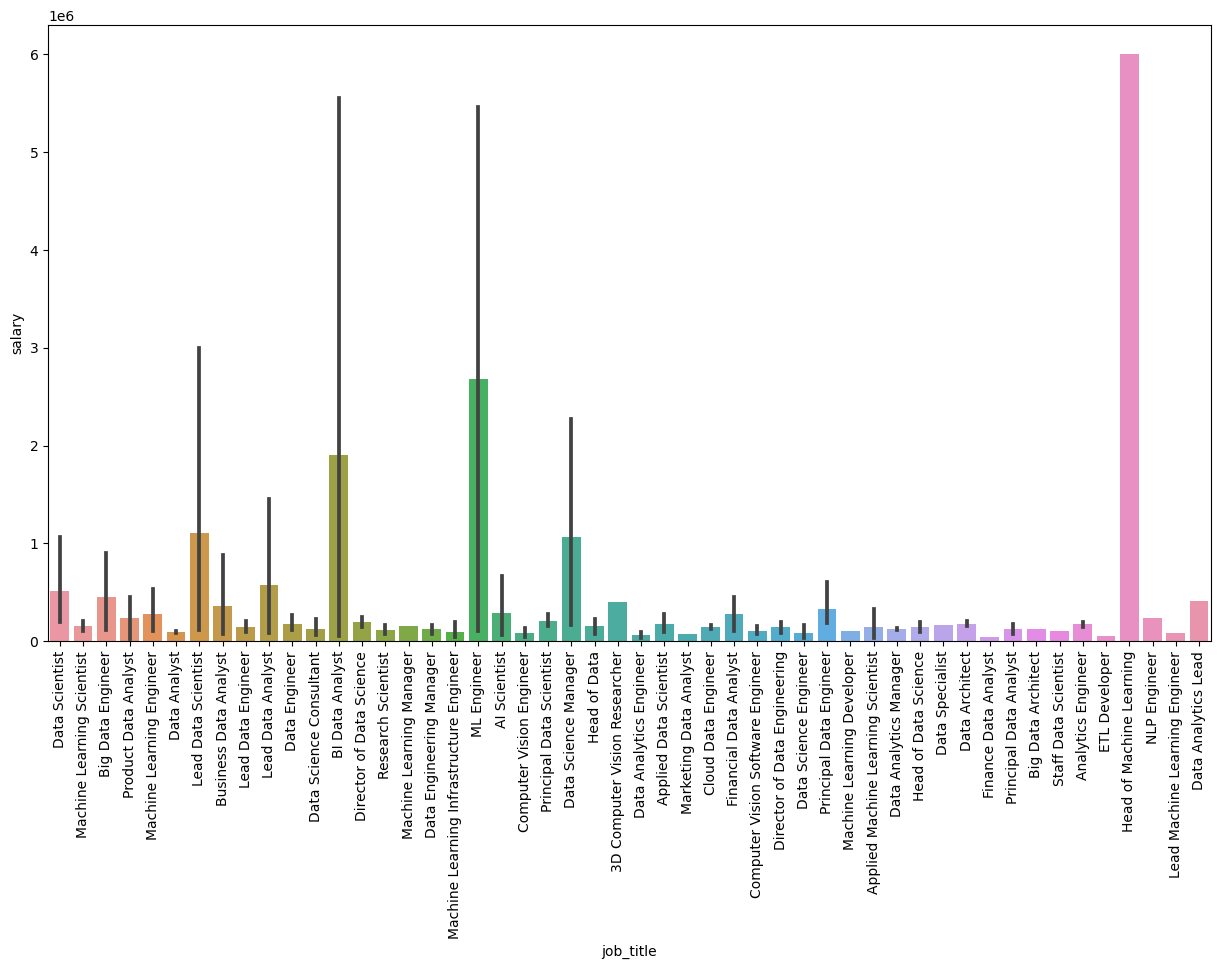

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x='job_title',y='salary',data=df)
plt.xticks(rotation=90)

In [14]:
final_df=df['job_title'].value_counts()
final_df

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [15]:
df.sort_values(by='salary',ascending=False)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
177,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
102,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
137,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
136,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
...,...,...,...,...,...,...,...,...,...,...,...
196,2021,EN,FT,BI Data Analyst,9272,USD,9272,KE,100,KE,S
124,2021,EN,PT,Data Analyst,8760,EUR,10354,ES,50,ES,M
15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L
185,2021,MI,FT,Data Engineer,4000,USD,4000,IR,100,IR,M


In [16]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [17]:
df[['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']]=df[['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']].astype('category')  
df.dtypes


work_year                int64
experience_level      category
employment_type       category
job_title             category
salary                   int64
salary_currency       category
salary_in_usd            int64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object

In [18]:
#converting category labels into numericallabels using labelencoder

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


label.fit(df.experience_level.drop_duplicates())
df.experience_level=label.transform(df.experience_level)


label.fit(df.employment_type.drop_duplicates())
df.employment_type=label.transform(df.employment_type)



label.fit(df.job_title.drop_duplicates())
df.job_title=label.transform(df.job_title)


label.fit(df.salary_currency.drop_duplicates())
df.salary_currency=label.transform(df.salary_currency)


label.fit(df.employee_residence.drop_duplicates())
df.employee_residence=label.transform(df.employee_residence)


label.fit(df.company_location.drop_duplicates())
df.company_location=label.transform(df.company_location)


label.fit(df.company_size.drop_duplicates())
df.company_size=label.transform(df.company_size)


In [19]:
df.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary                int64
salary_currency       int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

In [20]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop('salary',axis=1), df['salary'], test_size=0.2, random_state=42)

In [21]:
x_train.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
9,2020,3,2,33,16,125000,41,50,38,2
227,2021,2,2,22,7,88654,14,50,12,0
591,2022,3,2,16,16,144854,55,100,48,1
516,2022,3,2,21,16,152500,55,100,48,1
132,2021,2,2,4,16,38400,56,100,48,1


In [22]:
x_train.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary_currency       int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

In [23]:
x_train.describe()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,2021.416495,2.121649,1.995876,21.051546,13.138144,114155.193814,40.581443,70.824742,36.265979,0.806186
std,0.701044,1.044291,0.231737,10.424830,4.331259,72943.874734,18.292958,41.026853,15.854757,0.652049
min,2020.000000,0.000000,0.000000,1.000000,0.000000,4000.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,2.000000,15.000000,8.000000,63711.000000,20.000000,50.000000,18.000000,0.000000
50%,2022.000000,2.000000,2.000000,19.000000,16.000000,100800.000000,55.000000,100.000000,48.000000,1.000000
75%,2022.000000,3.000000,2.000000,22.000000,16.000000,152500.000000,55.000000,100.000000,48.000000,1.000000
max,2022.000000,3.000000,3.000000,49.000000,16.000000,600000.000000,56.000000,100.000000,48.000000,2.000000


In [24]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_predictions = linear_reg.predict(x_test)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)
logistic_reg_predictions = logistic_reg.predict(x_test)

# Decision Trees
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_predictions = decision_tree.predict(x_test)

# Random Forests
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
random_forest_predictions = random_forest.predict(x_test)

# Support Vector Machines
svm = SVC()
svm.fit(x_train, y_train)
svm_predictions = svm.predict(x_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes_predictions = naive_bayes.predict(x_test)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
kmeans_predictions = kmeans.predict(x_test)

# Neural Networks
neural_network = MLPClassifier()
neural_network.fit(x_train, y_train)
neural_network_predictions = neural_network.predict(x_test)

C:\Users\Lenovo\ab\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
# Print predictions
print("Linear Regression predictions:", linear_reg_predictions)
print("Logistic Regression predictions:", logistic_reg_predictions)
print("Decision Tree predictions:", decision_tree_predictions)
print("Random Forest predictions:", random_forest_predictions)
print("SVM predictions:", svm_predictions)
print("KNN predictions:", knn_predictions)
print("Naive Bayes predictions:", naive_bayes_predictions)
print("K-Means predictions:", kmeans_predictions)
print("Neural Network predictions:", neural_network_predictions)

Linear Regression predictions: [  97812.98350877  102790.17654023  202937.49624947  462565.9361175
  844423.72698513  178100.32277161  436952.83308029  417874.77653053
  254517.87748933  389156.66635823  622978.73087087  126017.07735375
  100899.79122505  727839.13088003  453714.17946106   64868.70582429
  311470.71216619  367768.23788583  489669.3177734   123222.98731157
  482553.95355871  524338.46509916   84777.47795016  332139.21027422
  242992.53783026  263962.96736932  232796.21370983  424312.96262699
  155483.86597404  229849.05948043  575430.47221929  113865.05186328
  354572.32177335  -12426.81126776  347539.68010351   78621.78501663
   70199.81453988   53683.07960397 -217562.10706159  361141.46497348
  107926.72994828  107926.72994828  759284.65876076  171622.98896381
  135271.72208244  526039.79416102  983861.17512438  341223.20838466
  380184.79672429  189042.57478255  143476.03227183  371605.67581409
  245523.81508902  126094.72616917   73969.85879612  110988.70830947
  22